In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [188]:
sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')

# Renomeando os atributos na mesma ordem que são apresentados no enunciado.
namelist = [
  "checkingstatus",
  "duration",
  "history",
  "purpose",
  "amount",
  "savings",
  "employ",
  "installment",
  "status",
  "others",
  "residence",
  "property",
  "age",
  "otherplans",
  "housing",
  "cards",
  "job",
  "liable",
  "tele",
  "foreign",
  "response" # Variável resposta
]

german_credit_data = pd.read_csv("german.data", delimiter=" ", names=namelist)

# Façamos uma cópia dos dados originais.
df = german_credit_data.copy()

In [189]:
# Checando se há valores nulos.
df.isnull().sum()

checkingstatus    0
duration          0
history           0
purpose           0
amount            0
savings           0
employ            0
installment       0
status            0
others            0
residence         0
property          0
age               0
otherplans        0
housing           0
cards             0
job               0
liable            0
tele              0
foreign           0
response          0
dtype: int64

Não há valores nulos.

In [190]:
# Checando se há duplicatas a remover.
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(1000, 21)
(1000, 21)


Não há duplicatas.

# Análise exploratória de dados básica

In [191]:
df.head()

,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,...,property,age,otherplans,housing,cards,job,liable,tele,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   checkingstatus  1000 non-null   object
 1   duration        1000 non-null   int64 
 2   history         1000 non-null   object
 3   purpose         1000 non-null   object
 4   amount          1000 non-null   int64 
 5   savings         1000 non-null   object
 6   employ          1000 non-null   object
 7   installment     1000 non-null   int64 
 8   status          1000 non-null   object
 9   others          1000 non-null   object
 10  residence       1000 non-null   int64 
 11  property        1000 non-null   object
 12  age             1000 non-null   int64 
 13  otherplans      1000 non-null   object
 14  housing         1000 non-null   object
 15  cards           1000 non-null   int64 
 16  job             1000 non-null   object
 17  liable          1000 non-null   int64 
 18  tele     

In [193]:
df.describe(include='all')

,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,...,property,age,otherplans,housing,cards,job,liable,tele,foreign,response
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,NaN
top,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,A101,...,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201,NaN
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,NaN
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,1.300000
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,0.458487
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,2.000000


In [194]:
df.nunique()

checkingstatus      4
duration           33
history             5
purpose            10
amount            921
savings             5
employ              5
installment         4
status              4
others              3
residence           4
property            4
age                53
otherplans          3
housing             3
cards               4
job                 4
liable              2
tele                2
foreign             2
response            2
dtype: int64

As variáveis que apresentam mais do que 20 valores distintos podem ser consideradas contínuas, e as demais, categóricas. Portanto, apenas três, duration, amount e age, são contínuas. **A variável resposta é categórica.**

# Análise exploratória visual

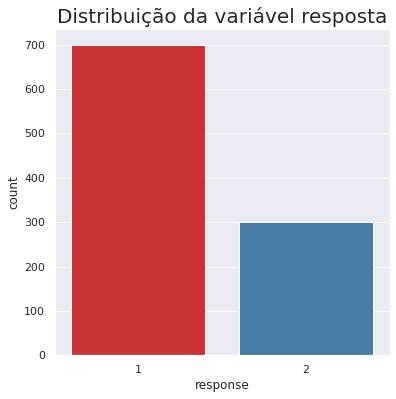

In [195]:
# Vamos utilizar a análise gráfica para selecionar os atributos mais adequados
# para machine learning.

plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="response", palette="Set1")
plt.title("Distribuição da variável resposta", fontsize=20)
plt.show()

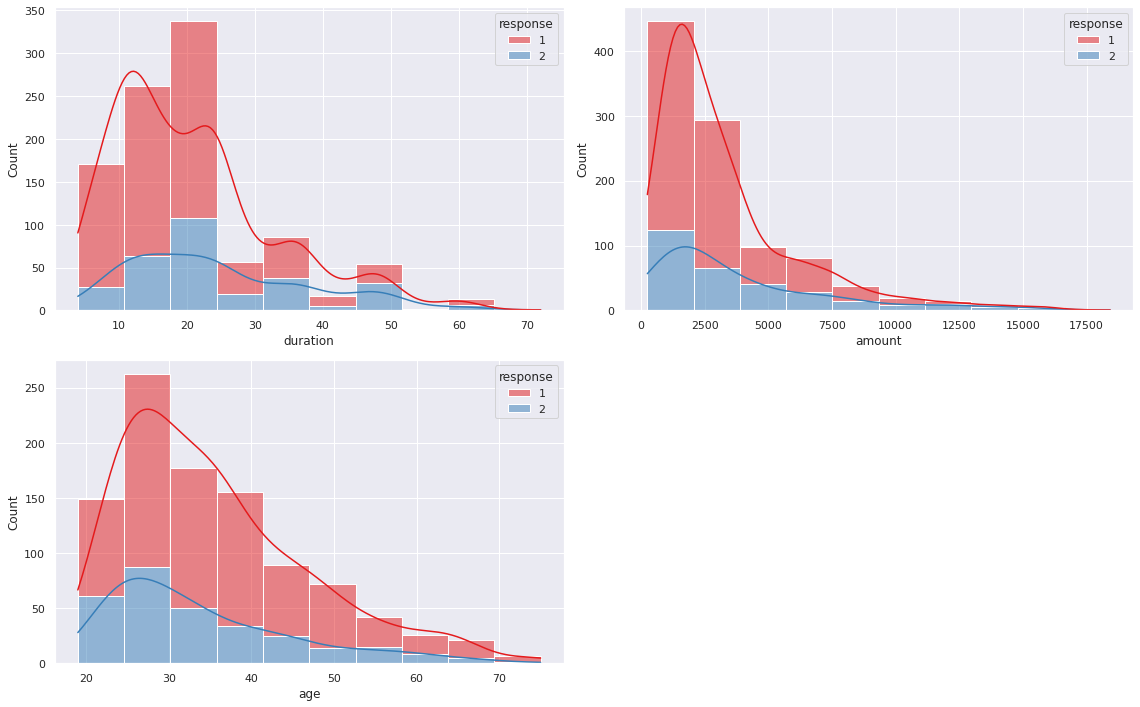

In [196]:
# Variáveis contínuas: histograma

plt.figure(figsize=(16, 10))

plt.subplot(2,2,1)
sns.histplot(data=df, x='duration', hue='response', multiple='stack', palette='Set1', kde=True, bins=10)

plt.subplot(2,2,2)
sns.histplot(data=df, x='amount', hue='response', multiple='stack', palette='Set1', kde=True, bins=10)

plt.subplot(2,2,3)
sns.histplot(data=df, x='age', hue='response', multiple='stack', palette='Set1', kde=True, bins=10)

plt.tight_layout()
plt.show()

Todos os três histogramas apresentam inclinação positiva. Para melhor analisar a presença de *outliers*, podemos transformar algumas das variáveis contínuas em categóricas, criando novos atributos. Neste caso, é interessante estabelecer faixas etárias e faixas de crédito a partir de *age* e *amount*.

In [197]:
age_interval = (18, 25, 35, 60, 120)
age_group = ['young adult', 'adult', 'middle age', 'senior']
df["age_group"] = pd.cut(df.age, age_interval, labels=age_group)

credit_interval = (0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000)
amount_group = ['x < 2500', '2500 <= x < 5000', 
              '5000 <= x < 7500', '7500 <= x < 10000', 
              '10000 <= x < 12500', '12500 <= x < 15000', '15000 <= x < 17500', '> 17500']
df['amount_group'] = pd.cut(df.amount, credit_interval, labels=amount_group)
df.head()

,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,...,otherplans,housing,cards,job,liable,tele,foreign,response,age_group,amount_group
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A143,A152,2,A173,1,A192,A201,1,senior,x < 2500
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A143,A152,1,A173,1,A191,A201,2,young adult,5000 <= x < 7500
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A143,A152,1,A172,2,A191,A201,1,middle age,x < 2500
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A143,A153,1,A173,2,A191,A201,1,middle age,7500 <= x < 10000
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A143,A153,2,A173,2,A191,A201,2,middle age,2500 <= x < 5000


In [198]:
# Análise da relação entre as duas categorias recém-estabelecidas:

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df['amount_group'], df['age_group']).style.background_gradient(cmap=cm)

age_group,young adult,adult,middle age,senior
amount_group,,,,
x < 2500,114,199,198,26
2500 <= x < 5000,48,127,89,11
5000 <= x < 7500,14,40,43,5
7500 <= x < 10000,7,20,18,1
10000 <= x < 12500,3,8,11,0
12500 <= x < 15000,2,3,6,2
15000 <= x < 17500,2,0,2,0
> 17500,0,1,0,0


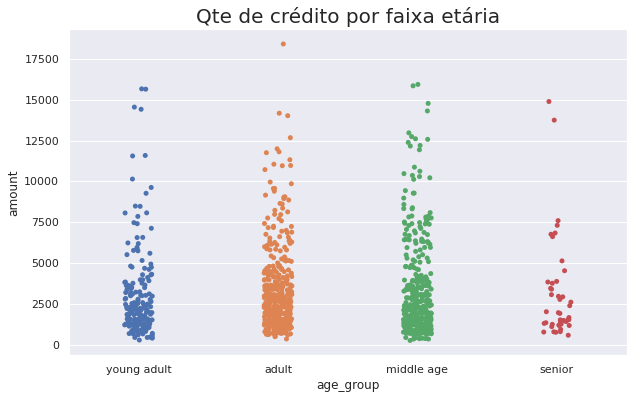

In [199]:
# Nota-se que há apenas um registro de concessão de crédito com valor superior a 17500 no dataset.
# Este é um possível outlier.

plt.figure(figsize=(10, 6))
plt.title("Qte de crédito por faixa etária", fontsize=20)
sns.stripplot(data=df, x='age_group', y='amount')
plt.show()

In [200]:
df[df['amount_group'] == "> 17500"]

,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,...,otherplans,housing,cards,job,liable,tele,foreign,response,age_group,amount_group
915,A12,48,A30,A410,18424,A61,A73,1,A92,A101,...,A141,A152,1,A174,1,A192,A202,2,adult,> 17500


Observamos que a cliente em questão é altamente qualificada (*job* A174) e possui residência própria (*housing* A152), o que sugere estabilidade financeira. De fato, a variável resposta tem valor 2, *good*, o que significa que o empréstimo foi pago em dia. Portanto, o registro pode continuar no *dataset*.

Vamos agora analisar a relação entre a variável resposta, categórica, e as variáveis contínuas, através de *box plots*.

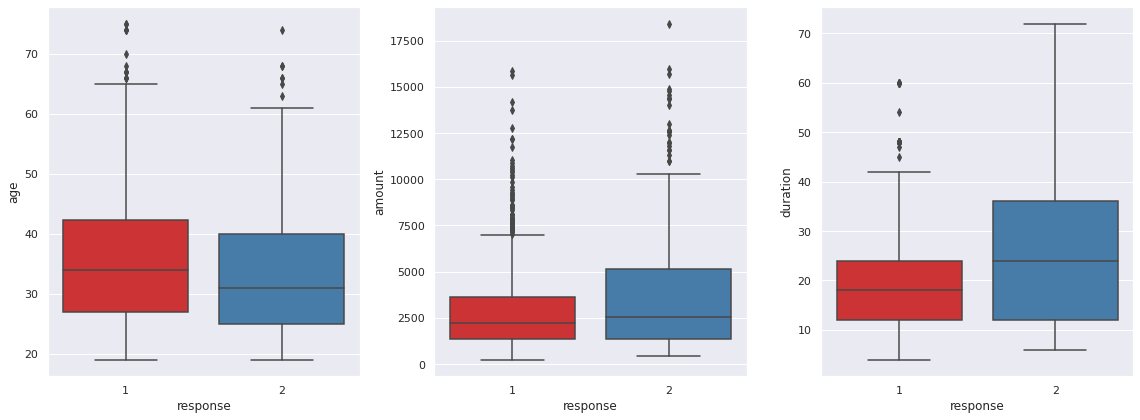

In [201]:
plt.figure(figsize=(16, 6))

x_list = ["age", "amount", "duration"]
    
index_plt = 1
for item in x_list:
  plt.subplot(1,3,index_plt)
  sns.boxplot(data=df, x='response', y=item, palette='Set1') 
  index_plt += 1

plt.tight_layout()
plt.show()

Observando o primeiro *box plot*, que analisa a relação entre a variável resposta e a idade do cliente, nota-se que o *range* de idade para bons e maus pagadores é muito similar. Isso indica que a variável idade pode não ser um fator correlacionado à inadimplência.

Vamos conduzir um teste de hipótese com a **hipótese nula (H0):** *não há correlação entre a variável resposta e a variável contínua em questão.*

In [202]:
def Anova(data, response_var, ContinuousPredictorList):
  from scipy.stats import f_oneway

  SelectedPredictors=[]
  
  print('Análise de variância: teste de hipótese')
  for predictor in ContinuousPredictorList:
    CategoryGroupLists=data.groupby(response_var)[predictor].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
      
      # Se o p-valor < 0.05, rejeitamos a hipótese nula.
    if (AnovaResults[1] < 0.05):
      print(predictor, 'TEM correlação com', response_var, '| P-Valor:', AnovaResults[1])
      SelectedPredictors.append(predictor)
    else:
      print(predictor, 'NÃO TEM correlação com', response_var, '| P-Valor:', AnovaResults[1])

  return(SelectedPredictors)

cont_var=['age', 'amount','duration']
Anova(df, 'response', ContinuousPredictorList=cont_var)

Análise de variância: teste de hipótese
age TEM correlação com response | P-Valor: 0.003925339398278295
amount TEM correlação com response | P-Valor: 8.797572373533373e-07
duration TEM correlação com response | P-Valor: 6.488049877187189e-12


['age', 'amount', 'duration']

Todas as variáveis contínuas estão correlacionadas com a variável resposta, e foram selecionadas para fazer parte do modelo.

Para analisar a relação entre a variável resposta e as demais variáveis categóricas, usaremos gráficos de barras.

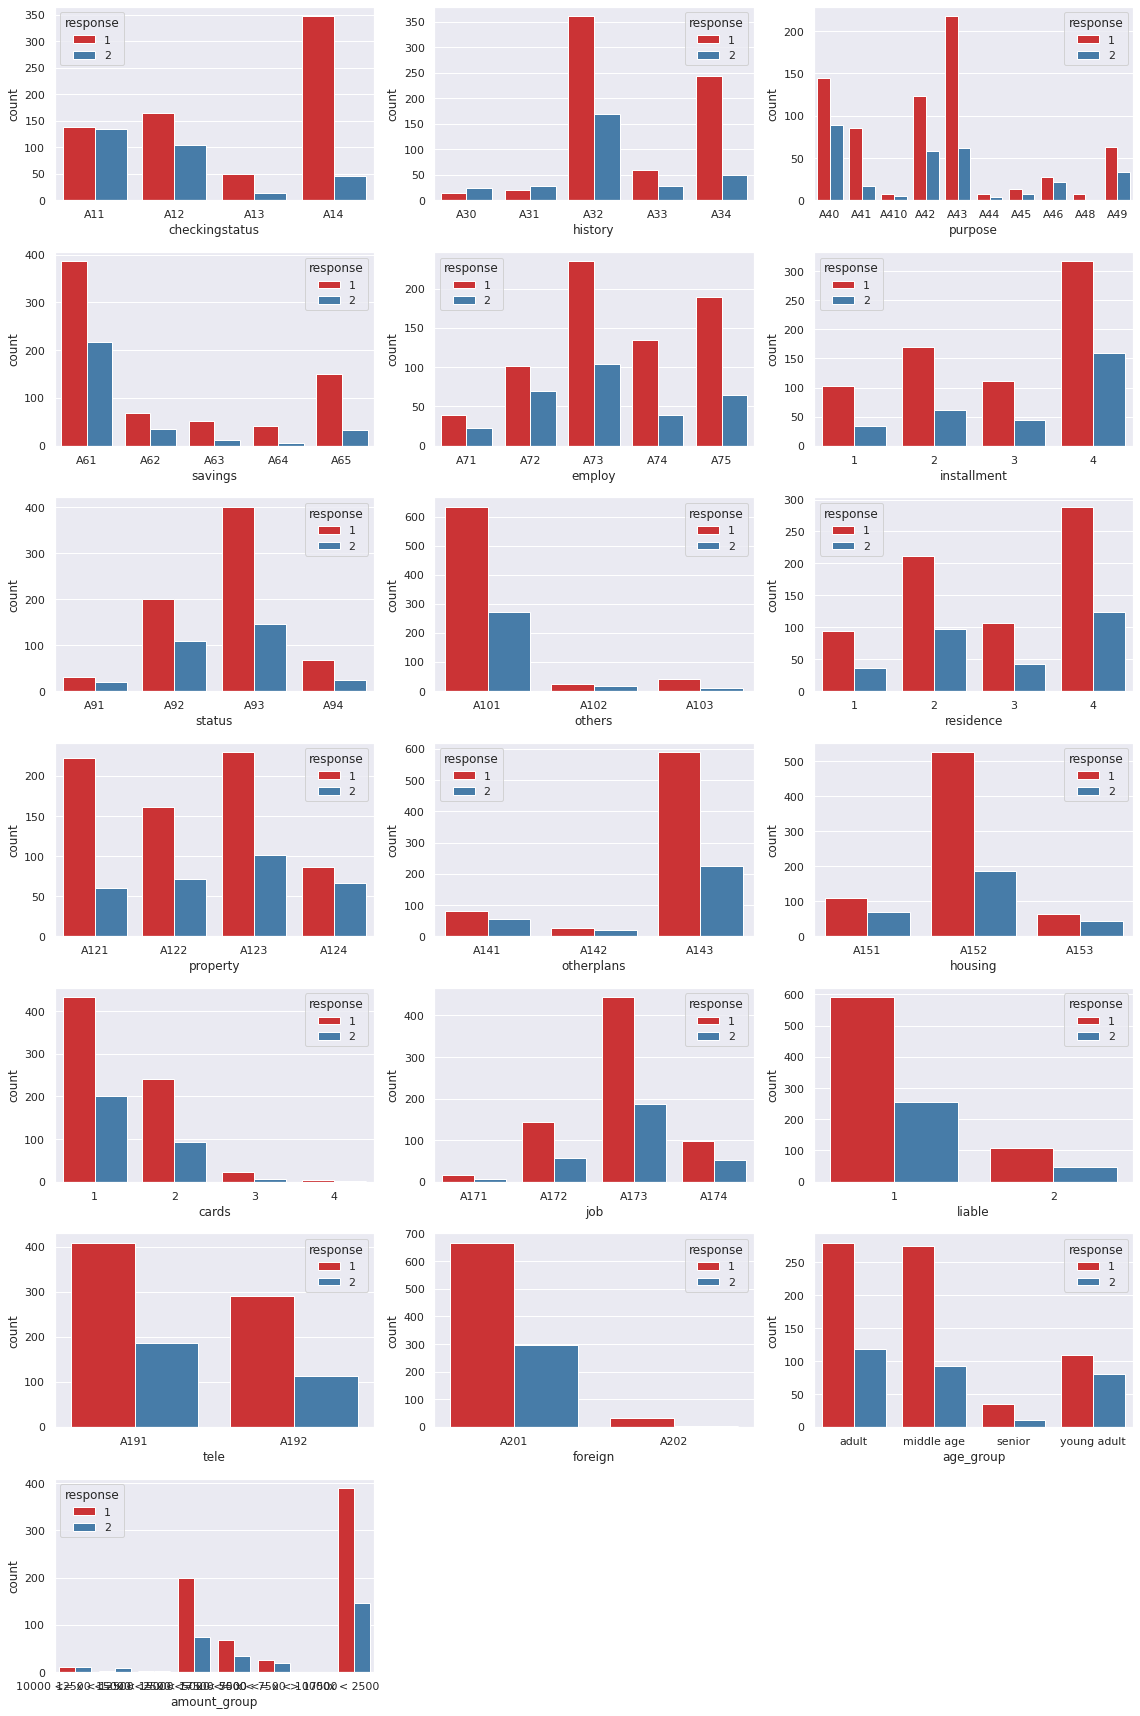

In [203]:
# Variáveis categóricas: bar plot

plt.figure(figsize=(16, 24))

x_list = [
  "checkingstatus",
  "history",
  "purpose",
  "savings",
  "employ",
  "installment",
  "status",
  "others",
  "residence",
  "property",
  "otherplans",
  "housing",
  "cards",
  "job",
  "liable",
  "tele",
  "foreign",
  "age_group",
  "amount_group"
]

index_plt = 1
for item in x_list:
  list_item = df[item].unique().tolist()
  plt.subplot(7,3,index_plt)
  sns.countplot(data=df, x=item, hue='response', palette='Set1', order=sorted(list_item))
  index_plt += 1

plt.tight_layout()
plt.show()

In [204]:
# Nos gráficos de barras, chama atenção a quantidade inexpressiva de estrangeiros no dataset.
print("Quantidade de estrangeiros no dataset:", len(df[df["foreign"]=="A202"]))

Quantidade de estrangeiros no dataset: 37


Como o atributo *foreign* tem apenas duas categorias, e uma delas é inexpressiva, representando apenas 3,7% da amostragem total, este atributo pode não ser interessante para treinar o modelo, e portanto, é um candidato a ser descartado nas próximas etapas. As outras apresentam diversidade aceitável.

Para testarmos a validade destas suposições, faremos teste qui-quadrado.

**Hipótese nula (H0):** *não há correlação entre a variável resposta e a variável categórica em questão.*

In [205]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # Se o P-Valor < 0.05, rejeitamos a hipótese nula.
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'TEM correlação com', TargetVariable, '| P-Valor:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'NÃO TEM correlação com', TargetVariable, '| P-Valor:', ChiSqResult[1])        
            
    return(SelectedPredictors)



CategoricalVariables=['checkingstatus', 'history', 'purpose','savings','employ',
                     'installment', 'status', 'others','residence', 'property',
                     'otherplans', 'housing', 'cards', 'job', 'liable', 'tele',
                      'foreign', 'age_group', 'amount_group']

# Calling the function
FunctionChisq(inpData=df, 
              TargetVariable='response',
              CategoricalVariablesList= CategoricalVariables)

checkingstatus TEM correlação com response | P-Valor: 1.2189020722893755e-26
history TEM correlação com response | P-Valor: 1.2791872956751013e-12
purpose TEM correlação com response | P-Valor: 0.00011574910079691586
savings TEM correlação com response | P-Valor: 2.7612142385682596e-07
employ TEM correlação com response | P-Valor: 0.0010454523491402541
installment NÃO TEM correlação com response | P-Valor: 0.1400333122128481
status TEM correlação com response | P-Valor: 0.02223800546926877
others TEM correlação com response | P-Valor: 0.036055954027247226
residence NÃO TEM correlação com response | P-Valor: 0.8615521320413175
property TEM correlação com response | P-Valor: 2.8584415733250017e-05
otherplans TEM correlação com response | P-Valor: 0.0016293178186473534
housing TEM correlação com response | P-Valor: 0.00011167465374597684
cards NÃO TEM correlação com response | P-Valor: 0.4451440800083001
job NÃO TEM correlação com response | P-Valor: 0.5965815918843431
liable NÃO TEM corr

['checkingstatus',
 'history',
 'purpose',
 'savings',
 'employ',
 'status',
 'others',
 'property',
 'otherplans',
 'housing',
 'foreign',
 'age_group',
 'amount_group']

Descartamos as variáveis *installment, residence, cards, job, liable* e *tele*. Contrário à expectativa inicial, mantivemos *foreign*.

É interessante notar que os atributos contínuos *age* e *amount*, que foram selecionados pela análise de variância, também tiveram seus equivalentes categóricos (*age_group* e *amount_group*, definidos anteriormente) validados e selecionados pelo teste qui-quadrado, como era de se esperar. No entanto, vamos prosseguir utilizando os atributos originais.

In [206]:
SelectedColumns = [
  "checkingstatus",
  "duration",
  "history",
  "purpose",
  "amount",
  "savings",
  "employ",
  "status",
  "others",
  "property",
  "age",
  "otherplans",
  "housing",
  "foreign"
]

df_ml=df[SelectedColumns]
df_ml.head()

,checkingstatus,duration,history,purpose,amount,savings,employ,status,others,property,age,otherplans,housing,foreign
0,A11,6,A34,A43,1169,A65,A75,A93,A101,A121,67,A143,A152,A201
1,A12,48,A32,A43,5951,A61,A73,A92,A101,A121,22,A143,A152,A201
2,A14,12,A34,A46,2096,A61,A74,A93,A101,A121,49,A143,A152,A201
3,A11,42,A32,A42,7882,A61,A74,A93,A103,A122,45,A143,A153,A201
4,A11,24,A33,A40,4870,A61,A73,A93,A101,A124,53,A143,A153,A201


# Convertendo as variáveis

Antes de prosseguir, precisamos converter as variáveis categóricas.

In [207]:
# Primeiro a coluna ordinal.
df_ml['employ'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)

df_ml['foreign'].replace({'A201':1, 'A202':0}, inplace=True)

# Convertendo todas as variáveis nominais.
df_ml_num=pd.get_dummies(df_ml)

# Adicionando a variável resposta novamente.
df_ml_num['response'] = df['response']

df_ml_num.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,duration,amount,employ,age,foreign,checkingstatus_A11,checkingstatus_A12,checkingstatus_A13,checkingstatus_A14,history_A30,...,property_A122,property_A123,property_A124,otherplans_A141,otherplans_A142,otherplans_A143,housing_A151,housing_A152,housing_A153,response
0,6,1169,5,67,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,48,5951,3,22,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,2
2,12,2096,4,49,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
3,42,7882,4,45,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
4,24,4870,3,53,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,2


# Separando as amostragens de treino e teste

Utilizaremos 75% dos dados para treinar o modelo (750 linhas) e o restante (250) para teste.

In [208]:
df_ml_num.columns

Index(['duration', 'amount', 'employ', 'age', 'foreign', 'checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
       'others_A102', 'others_A103', 'property_A121', 'property_A122',
       'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
       'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153',
       'response'],
      dtype='object')

In [209]:
from sklearn.model_selection import train_test_split

target='response'
Predictors=['duration', 'amount', 'employ', 'age', 'foreign', 'checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
       'others_A102', 'others_A103', 'property_A121', 'property_A122',
       'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
       'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153'
]

X = df_ml_num[Predictors].values
y = df_ml_num[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
print(X_train.shape, y_train.shape)

(750, 46) (750,)


# Modelo de regressão logística

LogisticRegression(C=1, solver='liblinear')
              precision    recall  f1-score   support

           1       0.81      0.88      0.85       178
           2       0.63      0.50      0.56        72

    accuracy                           0.77       250
   macro avg       0.72      0.69      0.70       250
weighted avg       0.76      0.77      0.76       250



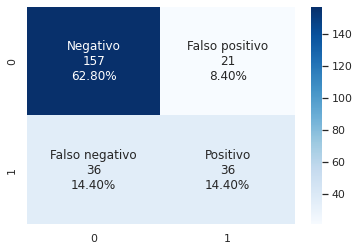

F1 weighted:
 [0.78666667 0.67200947 0.72238245 0.73104474 0.76028751 0.81371158
 0.62203742 0.79563492 0.78113208 0.74604343]

Acurácia média do modelo aplicado à amostragem de teste: 0.76


In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn import metrics

# C e penalty padrões
clf_lr = LogisticRegression(C=1,penalty='l2', solver='liblinear')
print(clf_lr)

logr=clf_lr.fit(X_train,y_train)
prediction=logr.predict(X_test)

print(metrics.classification_report(y_test, prediction))

# Matriz de erro
cf_matrix = metrics.confusion_matrix(y_test, prediction)

group_names = ['Negativo','Falso positivo','Falso negativo','Positivo']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.show()

F1_Score_logr=metrics.f1_score(y_test, prediction, average='weighted')
f1_weighted_logr=cross_val_score(logr, X , y, cv=10, scoring='f1_weighted')
print('F1 weighted:\n', f1_weighted_logr)
print('\nAcurácia média do modelo aplicado à amostragem de teste:', round(F1_Score_logr,2))

# Modelo random forest

RandomForestClassifier(max_depth=20)
              precision    recall  f1-score   support

           1       0.81      0.91      0.85       178
           2       0.67      0.46      0.55        72

    accuracy                           0.78       250
   macro avg       0.74      0.68      0.70       250
weighted avg       0.77      0.78      0.77       250



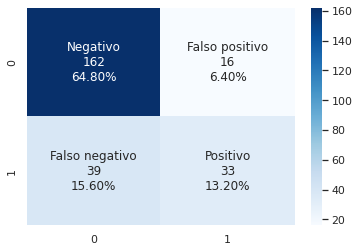

F1 weighted:
 [0.79897355 0.71776316 0.74802495 0.72702703 0.76902287 0.76516129
 0.70133333 0.81371158 0.72266667 0.73947368]

Acurácia média do modelo aplicado à amostragem de teste: 0.77


In [211]:
clf_rf = RandomForestClassifier(max_depth=20, n_estimators=100,criterion='gini')
print(clf_rf)

RF=clf_rf.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))

# Matriz de erro
cf_matrix = metrics.confusion_matrix(y_test, prediction)

group_names = ['Negativo','Falso positivo','Falso negativo','Positivo']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.show()

F1_Score_rf=metrics.f1_score(y_test, prediction, average='weighted')
f1_weighted_rf=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('F1 weighted:\n', f1_weighted_rf)
print('\nAcurácia média do modelo aplicado à amostragem de teste:', round(F1_Score_rf,2))

# Normalizando os dados

Vamos agora passar os dados normalizados com MinMaxScaler aos dois modelos para comparação.

In [212]:
from sklearn.preprocessing import MinMaxScaler

PredictorScaler=MinMaxScaler(feature_range = (0,1))

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

LogisticRegression(C=1, solver='liblinear')
              precision    recall  f1-score   support

           1       0.79      0.91      0.85       209
           2       0.69      0.46      0.55        91

    accuracy                           0.77       300
   macro avg       0.74      0.69      0.70       300
weighted avg       0.76      0.77      0.76       300



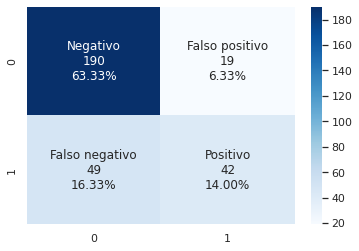

F1 weighted:
 [0.78666667 0.66403326 0.75159817 0.70952831 0.76028751 0.808
 0.63733333 0.77519841 0.77229833 0.7343254 ]

Acurácia média do modelo aplicado à amostragem de teste: 0.76


In [213]:
# Regressão logística com dados normalizados

clf_lr = LogisticRegression(C=1,penalty='l2', solver='liblinear')
print(clf_lr)

logr=clf_lr.fit(X_train,y_train)
prediction=logr.predict(X_test)

print(metrics.classification_report(y_test, prediction))

# Matriz de erro
cf_matrix = metrics.confusion_matrix(y_test, prediction)

group_names = ['Negativo','Falso positivo','Falso negativo','Positivo']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.show()

F1_Score_logr=metrics.f1_score(y_test, prediction, average='weighted')
f1_weighted_logr=cross_val_score(logr, X , y, cv=10, scoring='f1_weighted')
print('F1 weighted:\n', f1_weighted_logr)
print('\nAcurácia média do modelo aplicado à amostragem de teste:', round(F1_Score_logr,2))

RandomForestClassifier(max_depth=20)
              precision    recall  f1-score   support

           1       0.76      0.90      0.83       209
           2       0.61      0.36      0.46        91

    accuracy                           0.74       300
   macro avg       0.69      0.63      0.64       300
weighted avg       0.72      0.74      0.71       300



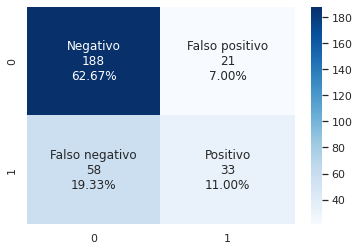

F1 weighted:
 [0.79897355 0.70606061 0.73089802 0.71019787 0.74796273 0.71411643
 0.68221388 0.7917953  0.75256116 0.73549151]

Acurácia média do modelo aplicado à amostragem de teste: 0.71


In [214]:
# Random forest com dados normalizados

clf_rf = RandomForestClassifier(max_depth=20, n_estimators=100, criterion='gini')
print(clf_rf)

RF=clf_rf.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))

# Matriz de erro
cf_matrix = metrics.confusion_matrix(y_test, prediction)

group_names = ['Negativo','Falso positivo','Falso negativo','Positivo']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.show()

F1_Score_rf=metrics.f1_score(y_test, prediction, average='weighted')
f1_weighted_rf=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('F1 weighted:\n', f1_weighted_rf)
print('\nAcurácia média do modelo aplicado à amostragem de teste:', round(F1_Score_rf,2))

# Discussão

Rodando o código múltiplas vezes, nota-se que o modelo de regressão logística apresenta resultados mais consistentes, mantendo a acurácia média *F1 score* em 76%, em decorrência dos valores médios de precisão e *recall* também se manterem praticamente constantes a 76% e 77%, respectivamente. Esse comportamento é observado com o solver *liblinear*; para o mesmo número de iterações, os solvers *newton-cg* e *lbfgs* não convergiram.

O modelo *random forest*, por sua vez, tem uma amplitude muito maior para as três métricas. As médias ponderadas de precisão e *recall* variam em uma faixa de 72%-77% e 73%-78%, respectivamente, e o *F1 score* varia de acordo em decorrência.

Os dois modelos tem *recall* superior à precisão, o que significa que tem maior probabilidade de evitar falsos negativos. No contexto de análise de crédito, um resultado falso positivo tem um impacto mais significativo que um falso negativo: conceder empréstimo a um cliente inadimplente trará mais prejuízo do que deixar de fazer negócio com um bom cliente. O modelo *random forest* se sobressai neste aspecto, uma vez que consegue evitar entre 3 e 9 erros do tipo falso positivo a mais do que o de regressão logística, o que representa um percentual significativo em relação aos 21 falsos positivos deste último. No entanto, essa amplitude chama atenção novamente para a inconsistência do modelo *RF*.

Ao rodar os dois modelos novamente após normalização dos dados, o desempenho da regressão logística se mantém praticamente inalterado, enquanto da *random forest* é penalizado, com a faixa de acurácia média diminuindo para 71%-76%. Aumentando o *max_depth* do classificador de 10 para 20, não há aparentes melhorias na consistência dos resultados. Acima disso, podem haver problemas de performance e aumento dos custos computacionais se o modelo for aplicado a *datasets* maiores. Como estamos trabalhando com um *dataset* pequeno, foram feitos alguns testes com valores mais elevados do parâmetro (até 100), sem apresentar melhorias. A omissão deste argumento e do *n_estimators* também não altera os resultados de maneira observável.

Feitas todas essas comparações, observamos que o modelo de regressão logística produz resultados mais precisos, coerentes e satisfatórios para este *dataset*, tanto antes quanto depois da normalização dos dados.